The goal of this homework is to create a regression model for predicting the prices (column 'Final Price').

Main : https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/cohorts/2024/02-regression/homework.md

Dataset: https://www.kaggle.com/datasets/juanmerinobermejo/laptops-price-dataset

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/kaggle/input/laptops-price-dataset/laptops.csv")

In [3]:
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [4]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [5]:
df.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [6]:
df = df[['ram', 'storage', 'screen', 'final_price']]

In [7]:
df.head()

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01


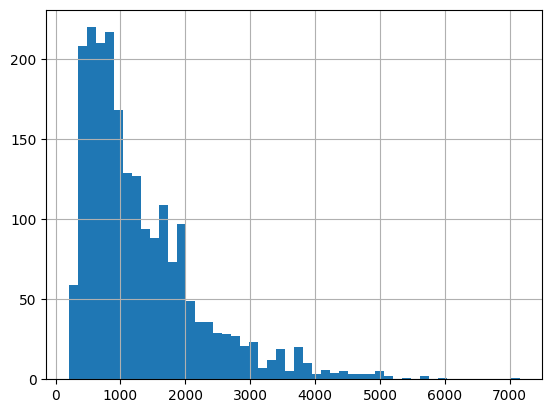

In [8]:
import matplotlib.pyplot as plt

df["final_price"].hist(bins=50)
plt.show()

## Question 1
There's one column with missing values. What is it?

+ 'ram'
+ 'storage'
+ 'screen'
+ 'final_price'

In [9]:
df.isnull().sum()>0

ram            False
storage        False
screen          True
final_price    False
dtype: bool

## Question 2
What's the median (50% percentile) for variable 'ram'?

In [10]:
df["ram"].median()

16.0

Prepare and split the dataset

Shuffle the dataset (the filtered one you created above), use seed 42.

Split your data in train/val/test sets, with 60%/20%/20% distribution.

Use the same code as in the lectures

## Question 3
1. We need to deal with missing values for the column from Q1.
2. We have two options: fill it with 0 or with the mean of this variable.
3. Try both options. For each, train a linear regression model without regularization using the code from the lessons.
4. For computing the mean, use the training only!
5. Use the validation dataset to evaluate the models and compare the RMSE of each option.
6. Round the RMSE scores to 2 decimal digits using round(score, 2)
7. Which option gives better RMSE?

In [13]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = df.drop(columns=['final_price'])
y = df['final_price']

n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

X_train_0 = df_train.fillna(0).drop(columns=['final_price'])
y_train_0 = df_train['final_price'].fillna(0)
X_val_0 = df_val.fillna(0).drop(columns=['final_price'])
y_val_0 = df_val['final_price'].fillna(0)

model_0 = LinearRegression()
model_0.fit(X_train_0, y_train_0)

y_pred_0 = model_0.predict(X_val_0)
rmse_0 = np.sqrt(mean_squared_error(y_val_0, y_pred_0))
rmse_0_rounded = round(rmse_0, 2)

X_train_mean = df_train.fillna(df_train.mean()).drop(columns=['final_price'])
y_train_mean = df_train['final_price'].fillna(df_train['final_price'].mean())
X_val_mean = df_val.fillna(df_train.mean()).drop(columns=['final_price'])
y_val_mean = df_val['final_price'].fillna(df_train['final_price'].mean())

model_mean = LinearRegression()
model_mean.fit(X_train_mean, y_train_mean)

y_pred_mean = model_mean.predict(X_val_mean)
rmse_mean = np.sqrt(mean_squared_error(y_val_mean, y_pred_mean))
rmse_mean_rounded = round(rmse_mean, 2)

print(f"RMSE with 0: {rmse_0_rounded}")
print(f"RMSE with mean: {rmse_mean_rounded}")

if rmse_0_rounded < rmse_mean_rounded:
    best_option = "With 0"
elif rmse_mean_rounded < rmse_0_rounded:
    best_option = "With mean"
else:
    best_option = "Both are equally good"

print(f"Best option: {best_option}")

RMSE with 0: 597.36
RMSE with mean: 600.27
Best option: With 0


## Question 4
* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0.
* Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which r gives the best RMSE?
* If there are multiple options, select the smallest r.

Options:

* 0
* 0.01
* 1
* 10
* 100

In [14]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

X = df.drop(columns=['final_price'])
y = df['final_price']

n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

X_train = df_train.fillna(0).drop(columns=['final_price'])
y_train = df_train['final_price'].fillna(0)
X_val = df_val.fillna(0).drop(columns=['final_price'])
y_val = df_val['final_price'].fillna(0)

r_values = [0, 0.01, 0.1, 1, 5, 10, 100]
best_rmse = float('inf')
best_r = None

for r in r_values:
    model = Ridge(alpha=r)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    rmse_rounded = round(rmse, 2)
    
    print(f"RMSE for r={r}: {rmse_rounded}")
    
    if rmse_rounded < best_rmse:
        best_rmse = rmse_rounded
        best_r = r

print(f"Best r: {best_r} with RMSE: {best_rmse}")

RMSE for r=0: 597.36
RMSE for r=0.01: 597.36
RMSE for r=0.1: 597.36
RMSE for r=1: 597.36
RMSE for r=5: 597.36
RMSE for r=10: 597.36
RMSE for r=100: 597.34
Best r: 100 with RMSE: 597.34


## Question 5
* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
* What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
* Round the result to 3 decimal digits (round(std, 3))

What's the value of std?

* 19.176
* 29.176
* 39.176
* 49.176

In [15]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = df.drop(columns=['final_price'])
y = df['final_price']

seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_scores = []

for seed in seeds:
    n = len(df)
    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test

    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)

    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]

    X_train = df_train.fillna(0).drop(columns=['final_price'])
    y_train = df_train['final_price'].fillna(0)
    X_val = df_val.fillna(0).drop(columns=['final_price'])
    y_val = df_val['final_price'].fillna(0)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    rmse_scores.append(rmse)

std_rmse = round(np.std(rmse_scores), 3)

print(f"RMSE Scores: {rmse_scores}")
print(f"Standard Deviation of RMSE: {std_rmse}")

RMSE Scores: [565.452086877098, 636.798542305672, 588.955869790797, 597.8148920012527, 571.9627915111037, 573.2383256618949, 647.3438328407246, 550.4398184485932, 587.3335036169913, 576.101792943311]
Standard Deviation of RMSE: 29.176


## Question 6
1. Split the dataset like previously, use seed 9.
2. Combine train and validation datasets.
3. Fill the missing values with 0 and train a model with r=0.001.
4. What's the RMSE on the test dataset?

Options:

* 598.60
* 608.60
* 618.60
* 628.60

In [17]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

X = df.drop(columns=['final_price'])
y = df['final_price']

n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

np.random.seed(9)
idx = np.arange(n)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

df_combined = pd.concat([df_train, df_val])

X_combined = df_combined.fillna(0).drop(columns=['final_price'])
y_combined = df_combined['final_price'].fillna(0)

X_test = df_test.fillna(0).drop(columns=['final_price'])
y_test = df_test['final_price'].fillna(0)

r = 0.001
model = Ridge(alpha=r)
model.fit(X_combined, y_combined)

y_pred_test = model.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

rmse_test_rounded = round(rmse_test, 2)

print(f"RMSE on the test dataset: {rmse_test_rounded}")

RMSE on the test dataset: 608.61
